In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dataset, distance, error, find, historical, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

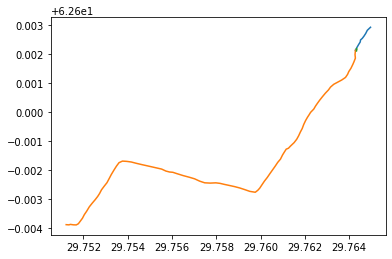

1228.617344478807
9.185500938242061


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1393786760018)#1376323154598)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.75)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_random_tail(data, head, 3)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

head_x, head_y = head_x[-10:], head_y[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
THRESHOLD = 10
findings = find.find_point_overlapping_trajectories(data, head[-1], THRESHOLD)

print(len(findings))

8


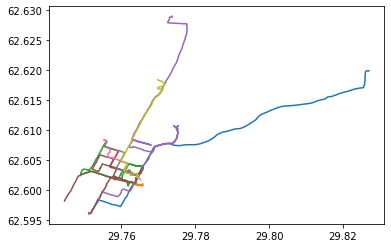

In [4]:
target_x, target_y = target_trajectory[:, 0], target_trajectory[:, 1]
plt.plot(target_y, target_x)

for f in findings:
    x, y = f[:, 0], f[:, 1]
    plt.plot(y, x)
plt.show()

In [5]:
SECONDS = 3
USER_ID = 898
RATIO = 0.75
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = historical.predict_by_picking_random_tail(data, head, SECONDS)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', pred_dist, len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)

1399399033400 failed
1412515702026 failed
1413382616849 failed
1379951571859 success 5.841146696924268 2 15.479408875912846
1379694392068 success 18.689520524129385 4 99.87306311872914
1407168712392 success 8.540219561204605 3 56.65827798145587
1400436362445 success 18.788765553666934 2 40.51777106567937
1407593205810 success 24.68346543390115 2 49.05224035391474
1396953544784 success 17.895361243297273 2 36.81549097151388
1408208026280 success 16.47690499474396 3 90.15524467948705
1404054152819 success 14.465179610631223 2 20.46655830227462
1401891357857 success 13.907476695593697 3 98.72245771719264
1394042416405 success 19.580706036091726 2 26.78380105414929
1380211927794 success 8.088758247956681 2 17.9492713421133
1377681725292 success 10.983560483582709 3 34.03210801279352
1397840479593 failed
1398930716368 success 14.410318053154542 2 17.378557894034262
1396260541459 success 17.697449905144655 2 3.4005945083170337
1404467994679 success 11.527692697854235 3 66.65914634874535
1412

1401555619182 success 10.767778860561895 2 6.114333798811912
1379750070367 failed
1404064273726 success 18.342183406908514 2 38.422483048867626
1402678393735 success 13.69068280265277 4 91.95546683680266
1377788791350 success 20.71827455716606 2 33.27509399955382
1404468390177 failed
1408288153631 failed
1411964134234 success 2.0286660091079285 3 9.921708936682705
1401629100713 success 6.813457996518691 2 9.519859886903353
1378655206255 success 12.093273475748301 4 27.0240431925584
1402158474401 failed
1379302234528 failed
1412417616700 success 7.9484170319044 2 18.600876370032672
1378141680529 success 9.205389824251691 2 11.791713620890363
1404389296311 success 14.411854187940262 2 12.685545432691704
1377503869598 success 11.18850524619539 3 54.82350658978871
1405012891914 failed
1399295150237 failed
1393786760018 success 15.900322146407627 2 10.32171628242076
1404392752815 failed
1411315645320 success 11.54167927308816 3 72.12254290438237
1376290443974 success 13.782190636235516 3 13